<a href="https://colab.research.google.com/github/edyoda/AI-Agent-Development-GENAIMD240525/blob/main/Session_3_Agents_Development_using_Autogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoGen Imports

In [1]:
!pip install -U "autogen-agentchat" "autogen-ext[openai,azure]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Model Integration with Autogen
#

In [3]:
from autogen_agentchat.agents import AssistantAgent, UserProxyAgent
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

from google.colab import userdata

# Define a model client. You can use other model client that implements
# the `ChatCompletionClient` interface.
oai_model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=userdata.get("OPENAI_API_KEY"),
)

model_client = OpenAIChatCompletionClient(
        model="deepseek-chat",
        temperature=0.85,
        api_key=userdata.get('DEEPSEEK_API_KEY'),
        base_url="https://api.deepseek.com/v1",
        model_info={
            "model_name": "deepseek-chat",
            "api_type": "openai",
            "vendor": "deepseek",
            "json_output": False,
            "vision": False,
            "function_calling": True,
            "function_call": False,
            "streaming": True,
            "cost_per_token": 0,
            "family": "deepseek",
        }
    )


# Define an AssistantAgent with the model, tool, system message, and reflection enabled.
# The system message instructs the agent via natural language.
agent = AssistantAgent(
    name="travel_planner_agent",
    model_client= model_client,
    #tools=[get_weather],
    system_message="You are a helpful travel planner assistant.",
    reflect_on_tool_use=True,
    model_client_stream=True,  # Enable streaming tokens from the model client.
)


# Run the agent and stream the messages to the console.
async def main() -> None:
    await Console(agent.run_stream(task="How should I plan my trip to Tezpur from Bangalore?"))
    # Close the connection to the model client.
    await model_client.close()


# NOTE: if running this inside a Python script you'll need to use asyncio.run(main()).
await main()

---------- TextMessage (user) ----------
How should I plan my trip to Tezpur from Bangalore?
---------- ModelClientStreamingChunkEvent (weather_agent) ----------
Planning a trip from **Bangalore to Tezpur** involves multiple travel options, including flights, trains, and road routes. Here’s a step-by-step guide to help you organize your trip:

### **1. By Flight (Fastest Option)**
- **Bangalore (BLR) → Guwahati (GAU)**  
  - Several airlines (IndiGo, Air India, SpiceJet) operate daily flights (1-stop or direct).  
  - **Duration:** ~3 to 5 hours (depending on layover).  
  - **Cost:** ₹4,000 – ₹10,000 (varies by season).  

- **Guwahati → Tezpur (By Road, ~180 km, 4-5 hrs)**  
  - Hire a **taxi** (₹3,000–₹4,500) or take a **bus** (ASTC/private, ₹300–₹600).  
  - **Train option:** Few trains run from Guwahati to Tezpur (check IRCTC).  

#### **Alternative Flight Route (Less Common)**  
- **Bangalore → Salonibari Airport (TEZ, Tezpur)**  
  - Limited flights (usually via Kolkata/Guwahati

In [4]:
from autogen_core.models import UserMessage
from google.colab import userdata

model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=userdata.get("OPENAI_API_KEY"),
)

result = await model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(result)
await model_client.close()

finish_reason='stop' content='The capital of France is Paris.' usage=RequestUsage(prompt_tokens=15, completion_tokens=7) cached=False logprobs=None thought=None


In [6]:
model_client = OpenAIChatCompletionClient(
        model="deepseek-chat",
        temperature=0.85,
        api_key=userdata.get('DEEPSEEK_API_KEY'),
        base_url="https://api.deepseek.com/v1",
        model_info={
            "model_name": "deepseek-chat",
            "api_type": "openai",
            "vendor": "deepseek",
            "json_output": False,
            "vision": False,
            "function_calling": True,
            "function_call": False,
            "streaming": True,
            "cost_per_token": 0,
            "family": "deepseek",
        }
    )



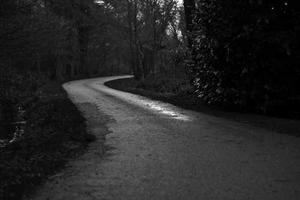

In [5]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img


In [ ]:
# Use asyncio.run(...) when running in a script.
result = await agent.run(task=multi_modal_message)
print(result.messages[-1].content)  # type: ignore

The image shows a serene landscape with a calm body of water reflecting the sky and clouds above. There is a line of trees along the water's edge, and the scene appears to be at either dawn or dusk, given the lighting. The overall atmosphere is peaceful and quiet.


In [9]:
import asyncio

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.base import TaskResult
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient



# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback. Respond with 'APPROVE' to when your feedbacks are addressed.",
)

# Define a termination condition that stops the task if the critic approves.
text_termination = TextMentionTermination("APPROVE")

# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=text_termination)


In [8]:
result = await team.run(task="Write a short poem about the fall season.")
print(result)

messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=19, completion_tokens=86), metadata={}, content='**Autumn’s Whisper**  \n\nThe leaves dance down in crimson gold,  \nA fleeting blaze, a story told.  \nThe air grows crisp, the light so mild,  \nAs nature sighs and rests awhile.  \n\nThe pumpkins grin, the branches bare,  \nA tang of spice upon the air.  \nOh, fleeting fall, so bold, so brief—  \nA golden joy, a bittersweet leaf.', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=117, completion_tokens=53), metadata={}, content='**APPROVE**  \n\nYour poem beautifully captures the essence of autumn with vivid imagery and a gentle, reflective tone. The rhythm flows smoothly, and the closing lines ("A golden joy, a bittersweet leaf") leave a poignant, memorable finish. Well done!', type='T

# Observing teams

In [10]:
await team.reset()  # Reset the team for a new task.
async for message in team.run_stream(task="Write a short poem about the fall season."):  # type: ignore
    if isinstance(message, TaskResult):
        print("Stop Reason:", message.stop_reason)
    else:
        print(message)

source='user' models_usage=None metadata={} content='Write a short poem about the fall season.' type='TextMessage'
source='primary' models_usage=RequestUsage(prompt_tokens=19, completion_tokens=86) metadata={} content="**Autumn's Whisper**  \n\nThe leaves dance down in crimson gold,  \nA fleeting flame, a story told.  \nThe air is crisp, the breeze sings low,  \nAs summer fades with amber glow.  \n\nThe pumpkins grin, the branches bare,  \nA whispered hush fills the chilled air.  \nYet in this change, so bold, so bright,  \nFall wraps the world in golden light." type='TextMessage'
source='critic' models_usage=RequestUsage(prompt_tokens=117, completion_tokens=127) metadata={} content='**APPROVE**  \n\nYour poem beautifully captures the essence of autumn with vivid imagery and a soothing rhythm. The contrast between warmth ("crimson gold," "amber glow") and the approaching chill ("breeze sings low," "branches bare") creates a lovely balance. The closing lines tie everything together with

# Providing Feedback During a Run

In [11]:
from autogen_agentchat.agents import AssistantAgent, UserProxyAgent
from autogen_agentchat.conditions import TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create the agents.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=userdata.get("OPENAI_API_KEY"),
)

assistant = AssistantAgent("assistant", model_client=model_client)
user_proxy = UserProxyAgent("user_proxy", input_func=input)  # Use input() to get user input from console.

# Create the termination condition which will end the conversation when the user says "APPROVE".
termination = TextMentionTermination("APPROVE")

# Create the team.
team = RoundRobinGroupChat([assistant, user_proxy], termination_condition=termination)

# Run the conversation and stream to the console.
stream = team.run_stream(task="Write a 4-line poem about the ocean.")
# Use asyncio.run(...) when running in a script.
await Console(stream)
await model_client.close()


---------- TextMessage (user) ----------
Write a 4-line poem about the ocean.
---------- TextMessage (assistant) ----------
Blue waves whisper secrets to the shore,  
Endless horizons where dreams take flight,  
Moonlit dance on a vast ocean floor,  
Nature's lullaby sung softly at night.  
TERMINATE
Enter your response: Use harry potter context
---------- TextMessage (user_proxy) ----------
Use harry potter context
---------- TextMessage (assistant) ----------
In Hogwarts' shadow, the waves gently sweep,  
Mermaids sing tales of ancient, magic might,  
Beneath the surface, secrets the ocean keeps,  
In the dark, mysterious depths of night.  
TERMINATE
Enter your response: APPROVE
---------- TextMessage (user_proxy) ----------
APPROVE


# Termination

In [12]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import MaxMessageTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create the agents.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=userdata.get("OPENAI_API_KEY"),
)

# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback for every message. Respond with 'APPROVE' to when your feedbacks are addressed.",
)


In [14]:
max_msg_termination = MaxMessageTermination(max_messages=3)
round_robin_team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=max_msg_termination)

# Use asyncio.run(...) if you are running this script as a standalone script.
await Console(round_robin_team.run_stream(task="Write a unique, Haiku about the weather in Bangalore"))


---------- TextMessage (user) ----------
Write a unique, Haiku about the weather in Bangalore
---------- TextMessage (primary) ----------
Monsoon whispers fall,  
Raindrops dance on bustling streets—  
Bangalore in bloom.
---------- TextMessage (critic) ----------
This Haiku effectively captures the monsoon season in Bangalore. The term "Monsoon whispers fall" evokes a sense of gentle, continuous rain, while "Raindrops dance on bustling streets" adds a dynamic image of the city’s lively environment. The phrase "Bangalore in bloom" beautifully signifies the city's transformation during this season. The structure and imagery are evocative and well-composed.

APPROVE


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a unique, Haiku about the weather in Bangalore', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=72, completion_tokens=20), metadata={}, content='Monsoon whispers fall,  \nRaindrops dance on bustling streets—  \nBangalore in bloom.', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=201, completion_tokens=82), metadata={}, content='This Haiku effectively captures the monsoon season in Bangalore. The term "Monsoon whispers fall" evokes a sense of gentle, continuous rain, while "Raindrops dance on bustling streets" adds a dynamic image of the city’s lively environment. The phrase "Bangalore in bloom" beautifully signifies the city\'s transformation during this season. The structure and imagery are evocative and well-composed.\n\nAPPROVE', type='TextMessage')], stop_reason='Maximum number of messages 3 reached, cu

# Managing State

In [15]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import MaxMessageTermination
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient


assistant_agent = AssistantAgent(
    name="assistant_agent",
    system_message="You are a helpful assistant",
    model_client=model_client,
)

# Use asyncio.run(...) when running in a script.
response = await assistant_agent.on_messages(
    [TextMessage(content="Write a 3 line poem on river ganga", source="user")], CancellationToken()
)
print(response.chat_message)
await model_client.close()


source='assistant_agent' models_usage=RequestUsage(prompt_tokens=26, completion_tokens=20) metadata={} content="Sacred waters flow,  \nAncient stories whispering,  \nGanga's grace renews." type='TextMessage'


In [16]:
agent_state = await assistant_agent.save_state()
print(agent_state)

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'Write a 3 line poem on river ganga', 'source': 'user', 'type': 'UserMessage'}, {'content': "Sacred waters flow,  \nAncient stories whispering,  \nGanga's grace renews.", 'thought': None, 'source': 'assistant_agent', 'type': 'AssistantMessage'}]}}


In [19]:
# Create the agents.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=userdata.get("OPENAI_API_KEY"),
)

new_assistant_agent = AssistantAgent(
    name="assistant_agent",
    system_message="You are a helpful assistant",
    model_client=model_client,
)
await new_assistant_agent.load_state(agent_state)

# Use asyncio.run(...) when running in a script.
response = await new_assistant_agent.on_messages(
    [TextMessage(content="What was the last line of the previous poem you wrote", source="user")], CancellationToken()
)
print(response.chat_message)
await model_client.close()

source='assistant_agent' models_usage=RequestUsage(prompt_tokens=66, completion_tokens=18) metadata={} content='The last line of the poem I wrote was:  \n"Ganga\'s grace renews."' type='TextMessage'


# Persisting states

In [32]:
# Create the agents.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=userdata.get("OPENAI_API_KEY"),
)

# Define a team.
assistant_agent = AssistantAgent(
    name="assistant_agent",
    system_message="You are a helpful assistant",
    model_client=model_client,
)
agent_team = RoundRobinGroupChat([assistant_agent], termination_condition=MaxMessageTermination(max_messages=2))

# Run the team and stream messages to the console.
stream = agent_team.run_stream(task="Write a beautiful poem 3-line about lake tangayika")

# Use asyncio.run(...) when running in a script.
await Console(stream)

# Save the state of the agent team.
team_state = await agent_team.save_state()

---------- TextMessage (user) ----------
Write a beautiful poem 3-line about lake tangayika
---------- TextMessage (assistant_agent) ----------
In Tanganyika's mirrored depths serene,  
Whispers of time dance upon waves aglow,  
Cradle of life, where ancient secrets convene.  


In [28]:
await agent_team.reset()
stream = agent_team.run_stream(task="What was the last line of the poem you wrote?")
await Console(stream)

---------- TextMessage (user) ----------
What was the last line of the poem you wrote?
---------- TextMessage (assistant_agent) ----------
I don't have a specific last line to refer to because I don't generate or store content that way. However, if you'd like, I can help create a new poem or provide a closing line for one you're working on. Let me know what you prefer!


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='What was the last line of the poem you wrote?', type='TextMessage'), TextMessage(source='assistant_agent', models_usage=RequestUsage(prompt_tokens=28, completion_tokens=51), metadata={}, content="I don't have a specific last line to refer to because I don't generate or store content that way. However, if you'd like, I can help create a new poem or provide a closing line for one you're working on. Let me know what you prefer!", type='TextMessage')], stop_reason='Maximum number of messages 2 reached, current message count: 2')

In [33]:
print(team_state)

# Load team state.
await agent_team.load_state(team_state)
stream = agent_team.run_stream(task="What was the last line of the poem you wrote?")
await Console(stream)

{'type': 'TeamState', 'version': '1.0.0', 'agent_states': {'assistant_agent': {'type': 'ChatAgentContainerState', 'version': '1.0.0', 'agent_state': {'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'Write a beautiful poem 3-line about lake tangayika', 'source': 'user', 'type': 'UserMessage'}, {'content': "In Tanganyika's mirrored depths serene,  \nWhispers of time dance upon waves aglow,  \nCradle of life, where ancient secrets convene.  ", 'thought': None, 'source': 'assistant_agent', 'type': 'AssistantMessage'}]}}, 'message_buffer': []}, 'RoundRobinGroupChatManager': {'type': 'RoundRobinManagerState', 'version': '1.0.0', 'message_thread': [{'source': 'user', 'models_usage': None, 'metadata': {}, 'content': 'Write a beautiful poem 3-line about lake tangayika', 'type': 'TextMessage'}, {'source': 'assistant_agent', 'models_usage': {'prompt_tokens': 29, 'completion_tokens': 32}, 'metadata': {}, 'content': "In Tanganyika's mirrored depths serene

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='What was the last line of the poem you wrote?', type='TextMessage'), TextMessage(source='assistant_agent', models_usage=RequestUsage(prompt_tokens=81, completion_tokens=23), metadata={}, content='The last line of the poem I wrote was:  \n"Cradle of life, where ancient secrets convene."', type='TextMessage')], stop_reason='Maximum number of messages 2 reached, current message count: 2')

In [34]:
import json

## save state to disk

with open("team_state.json", "w") as f:
    json.dump(team_state, f)

## load state from disk
with open("team_state.json", "r") as f:
    team_state = json.load(f)

new_agent_team = RoundRobinGroupChat([assistant_agent], termination_condition=MaxMessageTermination(max_messages=2))
await new_agent_team.load_state(team_state)
stream = new_agent_team.run_stream(task="What was the last line of the poem you wrote?")
await Console(stream)
await model_client.close()

---------- TextMessage (user) ----------
What was the last line of the poem you wrote?
---------- TextMessage (assistant_agent) ----------
The last line of the poem I wrote is:  
"Cradle of life, where ancient secrets convene."
